## Analysis of  StarTracker Pointing and Tracking Test - Slew and Settle - TMA Tracking Jitter Validation

(Analysis of serpent walk with random offsets)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# function to read in the metadata that has been downloaded
def read_rubintv(fname):
    df = pd.read_json(fname).T
    df = df.dropna()
    times = df[['UTC','UTC wide']]
    
    return df.set_index('UTC')


In [ ]:
# read in dataframe
fname = 'startracker_2023-03-09.json'
df = read_rubintv(fname)

In [55]:
df

,Exposure Time wide,MJD wide,Ra wide,Dec wide,Alt wide,Az wide,UTC wide,Exposure Time,MJD,Ra,...,Calculated Dec wide,Calculated Alt wide,Calculated Az wide,Delta Ra Arcsec wide,Delta Dec Arcsec wide,Delta Alt Arcsec wide,Delta Az Arcsec wide,Delta Rot Arcsec wide,RMS scatter arcsec wide,RMS scatter pixels wide
UTC,,,,,,,,,,,,,,,,,,,,,
00:09:47,5,60013.006804,147.584927,-20.755174,45.438896,89.573966,00:09:47,4,60013.006798,147.584931,...,-20.771653,45.251815,89.878287,-2.709905,-59.325366,-673.488731,1095.555919,1050383.586445,4.412145,0.509349
00:10:15,5,60013.00713,147.58499,-20.755174,45.54059,89.513847,00:10:16,4,60013.007125,147.584996,...,-20.771638,45.353503,89.818702,-2.533244,-59.268129,-673.513094,1097.478513,1050382.163924,4.406446,0.508694
00:10:25,5,60013.007241,147.585035,-20.755209,45.575238,89.49339,00:10:25,4,60013.007235,147.585052,...,-20.771692,45.387917,89.798604,-2.272147,-59.337748,-674.354962,1098.767723,1050380.622954,4.435253,0.51202
00:10:34,5,60013.007349,147.585093,-20.755174,45.608984,89.473347,00:10:34,4,60013.007344,147.585062,...,-20.771733,45.421771,89.778802,-2.399532,-59.612528,-673.967859,1099.639064,1050380.032883,4.417225,0.509938
00:10:43,5,60013.007459,147.585099,-20.755174,45.643181,89.453082,00:10:44,4,60013.007453,147.585028,...,-20.771706,45.455934,89.758701,-2.232958,-59.515211,-674.091351,1100.229944,1050379.682859,4.396507,0.507552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02:26:08,5,60013.101498,157.005027,-12.603737,61.75618,56.520189,02:26:09,4,60013.101493,157.005051,...,-12.615072,61.627226,57.138903,41.827495,-40.806975,-464.234349,2227.369287,980123.652515,5.536004,0.639015
02:32:36,5,60013.105987,157.00491,-12.603726,62.907931,54.185848,02:32:37,4,60013.105981,157.004953,...,-12.614352,62.78677,54.836708,44.224355,-38.252851,-436.178852,2343.098245,974081.8741,5.551676,0.640827
02:32:45,5,60013.10609,157.004893,-12.603726,62.934118,54.130014,02:32:46,4,60013.106085,157.004893,...,-12.614353,62.813044,54.781914,44.500238,-38.256061,-435.86422,2346.840069,973932.521334,5.336842,0.61602


In [56]:

# this is from our first attempt at the snake test - RA and Dec are wrong, as will be shown
df = df[600:646] # this is the initial attempt, with different numbers of observations

In [21]:
df.columns

Index(['Exposure Time wide', 'MJD wide', 'Ra wide', 'Dec wide', 'Alt wide',
       'Az wide', 'UTC wide', 'Exposure Time', 'MJD', 'Ra', 'Dec', 'Alt', 'Az',
       'nSources', 'nSources filtered', 'nSources wide',
       'nSources filtered wide', 'Calculated Ra', 'Calculated Dec',
       'Calculated Alt', 'Calculated Az', 'Delta Ra Arcsec',
       'Delta Dec Arcsec', 'Delta Alt Arcsec', 'Delta Az Arcsec',
       'Delta Rot Arcsec', 'RMS scatter arcsec', 'RMS scatter pixels',
       'Calculated Ra wide', 'Calculated Dec wide', 'Calculated Alt wide',
       'Calculated Az wide', 'Delta Ra Arcsec wide', 'Delta Dec Arcsec wide',
       'Delta Alt Arcsec wide', 'Delta Az Arcsec wide',
       'Delta Rot Arcsec wide', 'RMS scatter arcsec wide',
       'RMS scatter pixels wide'],
      dtype='object')

Text(0, 0.5, 'Dec')

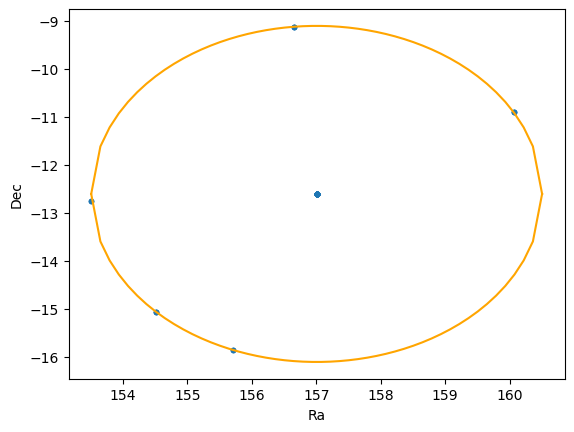

In [57]:
# this is not the ra and dec we want
plt.plot(df['Ra wide'], df['Dec wide'], '.')

base_ra = df['Ra wide'][0]
base_dec = df['Dec wide'][0]

ra_circ = np.linspace(-3.5, 3.5)

plt.plot(base_ra + ra_circ, base_dec + np.sqrt(3.5**2 - ra_circ**2), color = 'orange')
plt.plot(base_ra + ra_circ, base_dec - np.sqrt(3.5**2 - ra_circ**2), color = 'orange')


plt.xlabel('Ra')
plt.ylabel('Dec')

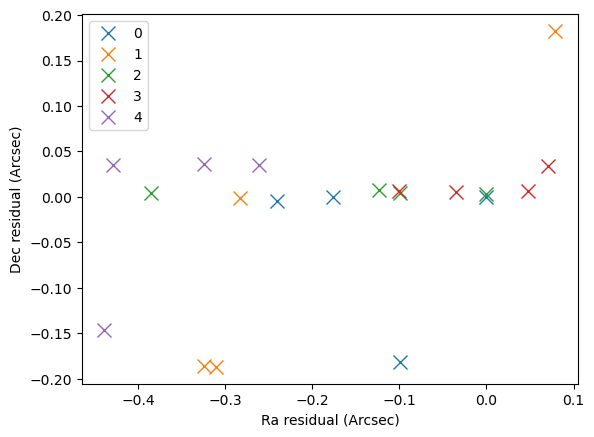

In [58]:
# this plot is for the first run, where there were different numbers of images taken at each location
# it plots the center

counter = 0
center_time = 0

for i in range(len(df['Ra wide'])):
    if counter == 0:
        ra = []
        dec = []
    if (df['Ra wide'][i] < base_ra + 0.5) and (df['Ra wide'][i] > base_ra - 0.5) and \
    (df['Dec wide'][i] < base_dec + 0.5) and (df['Dec wide'][i] > base_dec - 0.5):
        ra.append(df['Ra wide'][i])
        dec.append(df['Dec wide'][i])
        counter += 1
    else:
        if counter > 0:
            plt.plot((np.array(ra) - base_ra)*3600 * np.cos(base_dec * np.pi/180), (np.array(dec) - base_dec)*3600, 'x', label = str(center_time), markersize = 10)
            counter = 0
            center_time +=1
        

plt.xlabel('Ra residual (Arcsec)')
plt.ylabel('Dec residual (Arcsec)')
plt.legend()

In [61]:
fname = 'startracker_2023-03-09 (4).json'
df_2 = read_rubintv(fname)

In [67]:
df_2[646:] # next round

,Exposure Time wide,MJD wide,Ra wide,Dec wide,Alt wide,Az wide,UTC wide,Exposure Time,MJD,Ra,...,Calculated Dec wide,Calculated Alt wide,Calculated Az wide,Delta Ra Arcsec wide,Delta Dec Arcsec wide,Delta Alt Arcsec wide,Delta Az Arcsec wide,Delta Rot Arcsec wide,RMS scatter arcsec wide,RMS scatter pixels wide
UTC,,,,,,,,,,,,,,,,,,,,,
02:45:05,5,60013.114648,51.315595,-50.116543,24.806753,224.841782,02:45:05,4,60013.114642,51.315481,...,-50.110503,24.913058,224.9757,156.081575,21.743214,382.69769,482.106992,547775.009154,4.318577,0.498283
02:45:14,5,60013.114752,51.315546,-50.116525,24.783849,224.83351,02:45:14,4,60013.114747,51.315576,...,-50.110447,24.890085,224.967488,156.563047,21.877478,382.448564,482.319418,547870.387846,4.231342,0.488219
02:45:22,5,60013.114855,51.315429,-50.116524,24.761145,224.825273,02:45:23,4,60013.114849,51.315576,...,-50.110633,24.867561,224.959146,157.049594,21.20554,383.09687,481.944485,547957.098441,4.325858,0.499131
02:45:43,5,60013.115095,54.813474,-49.999936,26.819974,225.664956,02:45:44,4,60013.115089,54.813507,...,-49.992647,26.927276,225.789512,143.066573,26.242441,386.287633,448.402504,539836.699275,5.020794,0.579332
02:45:52,5,60013.115197,54.81356,-49.999953,26.797125,225.657593,02:45:53,4,60013.115192,54.813454,...,-49.99273,26.904538,225.782148,143.762822,26.002409,386.685043,448.399832,539930.526769,4.853636,0.560039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03:53:30,5,60013.162168,191.832477,-49.601765,56.304861,135.611473,03:53:31,4,60013.162163,191.832466,...,-49.614145,56.061434,135.708136,-35.087973,-44.568171,-876.337406,347.988107,1207095.645613,5.182003,0.598183
03:53:39,5,60013.162271,191.832459,-49.601743,56.327325,135.627141,03:53:40,4,60013.162265,191.832386,...,-49.614066,56.083732,135.723352,-34.989198,-44.365817,-876.937274,346.357734,1207241.784108,5.112604,0.590173
03:54:13,5,60013.162659,209.073707,-51.897614,45.303332,134.895457,03:54:13,4,60013.162653,209.073718,...,-51.911507,45.064258,135.031271,-48.060344,-50.017596,-860.663388,488.927923,1157441.194945,3.478449,0.401406


In [64]:
df.columns

Index(['Exposure Time wide', 'MJD wide', 'Ra wide', 'Dec wide', 'Alt wide',
       'Az wide', 'UTC wide', 'Exposure Time', 'MJD', 'Ra', 'Dec', 'Alt', 'Az',
       'nSources', 'nSources filtered', 'nSources wide',
       'nSources filtered wide', 'Calculated Ra', 'Calculated Dec',
       'Calculated Alt', 'Calculated Az', 'Delta Ra Arcsec',
       'Delta Dec Arcsec', 'Delta Alt Arcsec', 'Delta Az Arcsec',
       'Delta Rot Arcsec', 'RMS scatter arcsec', 'RMS scatter pixels',
       'Calculated Ra wide', 'Calculated Dec wide', 'Calculated Alt wide',
       'Calculated Az wide', 'Delta Ra Arcsec wide', 'Delta Dec Arcsec wide',
       'Delta Alt Arcsec wide', 'Delta Az Arcsec wide',
       'Delta Rot Arcsec wide', 'RMS scatter arcsec wide',
       'RMS scatter pixels wide'],
      dtype='object')

In [72]:
fname = 'startracker_2023-03-09 (7).json'
df_3 = read_rubintv(fname)

In [82]:
df_3 = df_3[946:]

Text(0, 0.5, 'Dec')

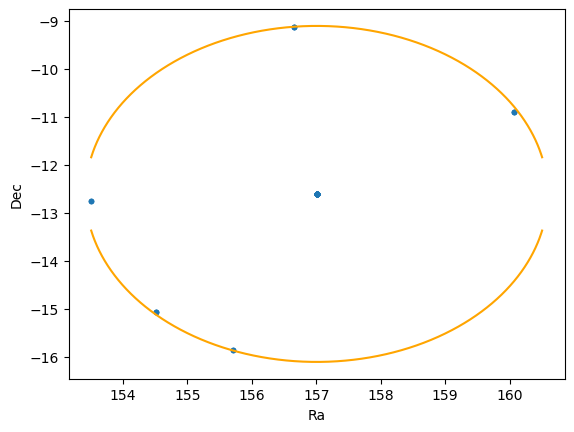

In [88]:
plt.plot(df['Ra wide'], df['Dec wide'], '.')

base_ra = df['Ra wide'][0]
base_dec = df['Dec wide'][0]

ra_circ = np.linspace(-3.5, 3.5, num = 1000)

plt.plot(base_ra + ra_circ, base_dec + np.sqrt(3.5**2 - (ra_circ * np.cos(base_dec * np.pi/180))**2), color = 'orange')
plt.plot(base_ra + ra_circ, base_dec - np.sqrt(3.5**2 - (ra_circ * np.cos(base_dec * np.pi/180))**2), color = 'orange')


plt.xlabel('Ra')
plt.ylabel('Dec')

## Testing uniform distributon options for an ellipse

The first is uniform, the second is not

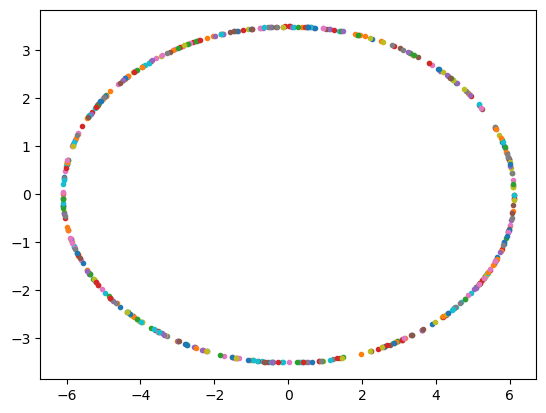

In [101]:
offset_size = 3.5
for i in range(500):
    random_angle = 2 * np.pi * np.random.rand()
    offset_dec = offset_size * np.cos(random_angle)
    sign = 1 if np.random.rand() < 0.5 else -1
    offset_ra = sign * np.sqrt(offset_size ** 2 - offset_dec ** 2) / np.cos(-55 * np.pi/180)
    plt.plot(offset_ra, offset_dec, '.')

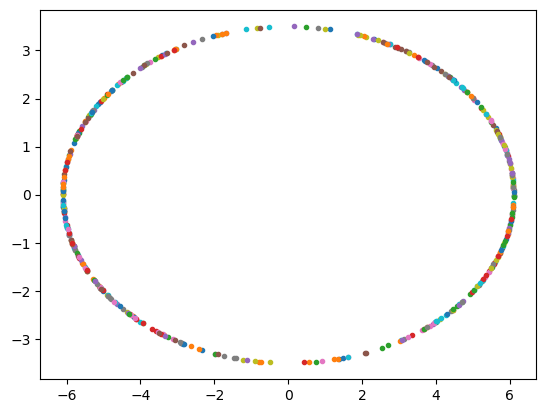

In [100]:
offset_size = 3.5
for i in range(500):
    offset_dec = offset_size * (2 * np.random.rand() - 1)
    sign = 1 if np.random.rand() < 0.5 else -1
    offset_ra = sign * np.sqrt(offset_size ** 2 - offset_dec ** 2) / np.cos(-55 * np.pi/180)
    plt.plot(offset_ra, offset_dec, '.')